In [1]:
# pip install sklearn
# pip install pandas
# pip install matplotlib.pyplot
# pip install --upgrade pip
#pip install seaborn

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('metrics.csv')
df = df.drop_duplicates(subset=['Type Name'])
df = df.drop(['Project.Package Name', 'Method Name', 'MLOC', 'CC', 'PC', 'Abstract Function Call From Constructor', 'Complex Conditional', 
              'Complex Method', 'Empty catch clause', 'Long Identifier', 'Long Method', 'Long Parameter List',
              'Long Statement', 'Missing default', 'Deficient encapsulation', 'Unexploited modularization',
             'Broken modularization', 'Cyclically-dependent modularization', 'Hub-like modularization', 'Insufficient modularization',
             'Broken hierarchy', 'Cyclic hierarchy', 'Deep hierarchy', 'Missing hierarchy','Missing hierarchy',
             'Multipath hierarchy', 'Rebellious hierarchy', 'Wide hierarchy'], axis=1)

df.set_index('Type Name', inplace = True)
# for decision tree making, don't need for library
# train_data = df.values.tolist()
# train_data = train_data[10000: 50000] 

df[:10]

,NOF,NOPF,NOM,NOPM,LOC,WMC,NC,DIT,LCOM,FANIN,FANOUT,Magic Number
Type Name,,,,,,,,,,,,
CachedThreadPool,0,0,1,1,12,2,0,0,-1.0,0,0,1
Sleeper,1,0,2,2,21,2,0,0,0.0,0,0,0
Joiner,1,0,2,2,17,2,0,0,0.0,0,0,0
Joining,0,0,1,1,7,1,0,0,-1.0,0,0,1
FixedThreadPool,0,0,1,1,12,2,0,0,-1.0,0,0,1
Interrupting,1,0,2,1,21,2,0,0,0.0,1,1,1
SleepBlocked,0,0,1,1,14,1,0,0,-1.0,0,0,1
IOBlocked,1,0,2,2,21,3,0,0,0.0,0,0,0
SynchronizedBlocked,0,0,4,4,18,5,0,0,-1.0,0,0,0


In [3]:
# 40000 train set, 10000 test set
train_x = df.iloc[10000:50000,0:11]
train_y = df.iloc[10000:50000,11:12]
test_x = df.iloc[:10000,0:11]
test_y = df.iloc[:10000,11:12]

# 50000 train set, 20000 test set
train_x2 = df.iloc[50000:100000,0:11]
train_y2 = df.iloc[50000:100000,11:12]
test_x2 = df.iloc[:20000,0:11]
test_y2 = df.iloc[:20000,11:12]

In [5]:
# Randomforest-number of train set: 40000/ test set: 10000

from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(random_state=0)
rforest.fit(train_x, train_y.values.ravel())

RandomForestClassifier(random_state=0)

In [6]:
print("Test set score : {:.2f}".format(rforest.score(test_x, test_y)))

Test set score : 0.83


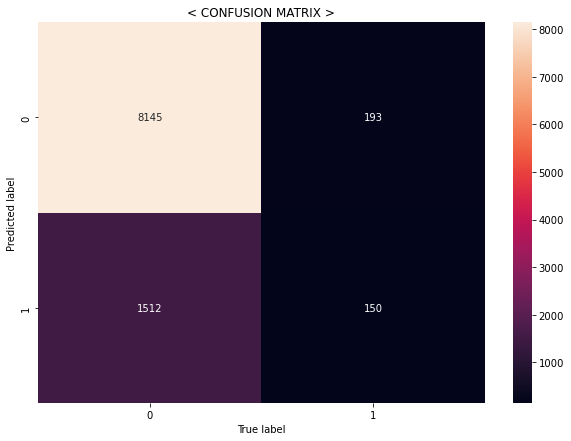

In [7]:
# Confusion matrix for rforest

from sklearn.metrics import confusion_matrix
import seaborn as sn

pred_y = rforest.predict(test_x)
rtree_cmd = confusion_matrix(test_y, pred_y)

plt.figure(figsize=(10, 7))
sn.heatmap(rtree_cmd, annot=True, fmt='d')

plt.title("< CONFUSION MATRIX >")
plt.ylabel('Predicted label')
plt.xlabel('True label')

plt.show()

In [8]:
# Randomforest-number of train set: 50000/ test set: 10000
rforest2 = RandomForestClassifier(random_state=0)
rforest2.fit(train_x2, train_y2.values.ravel())

RandomForestClassifier(random_state=0)

In [9]:
print("Test set score : {:.2f}".format(rforest2.score(test_x, test_y)))

Test set score : 0.83


In [11]:
# Randomforest-number of train set: 50000/ test set: 20000
print("Test set score : {:.2f}".format(rforest2.score(test_x2, test_y2)))

Test set score : 0.86


In [12]:
# Randomforest-number of train set: 40000/ test set: 20000

rforest3 = RandomForestClassifier(random_state=0)
rforest3.fit(train_x, train_y.values.ravel())

RandomForestClassifier(random_state=0)

In [13]:
print("Test set score : {:.2f}".format(rforest3.score(test_x2, test_y2)))

Test set score : 0.91


In [14]:
# DecsisiontTree following

from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state=0)
decisionTree.fit(train_x, train_y.values.ravel())

DecisionTreeClassifier(random_state=0)

In [15]:
print("Test set score : {:.2f}".format(decisionTree.score(test_x, test_y)))

Test set score : 0.79


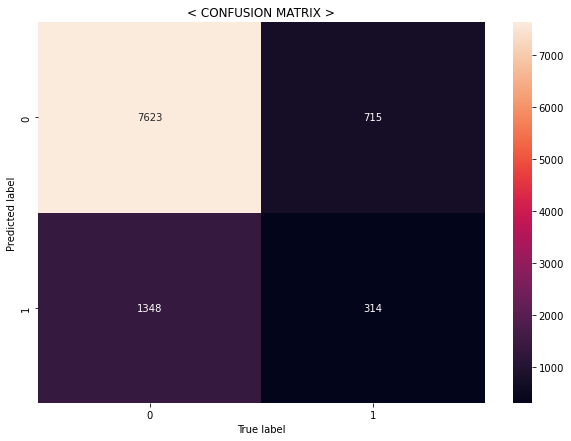

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

pred_y = decisionTree.predict(test_x)
cmdtree = confusion_matrix(test_y, pred_y)

plt.figure(figsize=(10, 7))
sn.heatmap(cmdtree, annot=True, fmt='d')

plt.title("< CONFUSION MATRIX >")
plt.ylabel('Predicted label')
plt.xlabel('True label')

plt.show()